# HW3

1) setup from HW2

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
import math
import sklearn
import statistics

#import sys
#!{sys.executable} -m pip install sklearn

In [2]:
tweet_counts=pd.read_csv('/home/justin/Documents/PHYS247/tweet_counts.csv')
tweet_counts["count"].mean()
k=tweet_counts['count'].values
w=tweet_counts['week'].values

Text(0.5, 1.0, 'Weekly tweet counts')

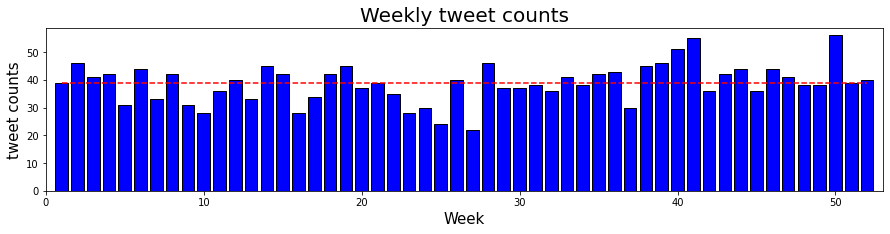

In [3]:
# plot tweet counts
plt.figure(figsize=(15,3))
plt.bar(np.arange(1,53),tweet_counts["count"], color='blue',edgecolor='black')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.hlines(tweet_counts["count"].mean(),1,52,colors='red',linestyles='dashed')

plt.title('Weekly tweet counts', fontsize=20)

In [4]:
# Take the average value of $\lambda$ from part "a" to estimate $\alpha$.
# Plot the estimated distribution function (P($\lambda$) vs $\lambda$).
λ_est = tweet_counts["count"].mean()
α = 1/λ_est
α

0.025793650793650796

In [5]:
# Define and vectorize likelihood functions
Poisson=lambda k,λ : (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

Exponential=lambda λ,a: a*np.exp(-λ*a)
Exponential=np.vectorize(Exponential)

# Posterior function for Bayesian calculation
def log_posterior(data,param):
    k,w=data
    lamb1,lamb2,W_s=param
    
    P=0
    
    for i in k[w<W_s]:
        P=P+np.log(Poisson(i,lamb1)*α*np.exp(-α*lamb1))

    for j in k[w>=W_s]:
        P=P+np.log(Poisson(j,lamb2)*α*np.exp(-α*lamb2))
        
    return(P)

## a) write code to implement Metropolis-Hastings algorithm and find posterior distributions

In [6]:
# https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a
# Initialize all the variables (θ) and number of iterations (n)

# For n iterations:
# 2.  Find the posterior at point θ
# 3.  Define a reasonable function to move from point θ to θ′ (should we use the Poisson?)
# 4.  Find r=Posterior(θ′)/Posterior(θ)
# 5.  Generate a uniform random number (rand) between 0 and 1.
# 6.  if r > rand; then move to new point θ′, otherwise, stay in the same point θ

def MCMC(log_Posterior,data,initial,step_cov,n_iteration):
    param1=np.array(initial)
    sample=np.array(initial)
    for j in range(n_iteration):
        log_Posterior_i=log_Posterior(data,param1)
        #update the location
        param2=np.random.multivariate_normal(param1,step_cov)
        #find new posterior
        log_Posterior_f=log_Posterior(data,param2)
        # generate a random number between 0 and 1
        rand=np.random.rand()
        if log_Posterior_f-log_Posterior_i>np.log(rand):
            sample=np.vstack((sample,param2))
            param1=param2[:]
        else:
            sample=np.vstack((sample,param1))
    return(sample)

In [7]:
# run MCMC to obtain posteriors
D=MCMC(log_posterior,data=[k,w],initial=[20,20,20],step_cov=[[0.25,0,0],[0,0.25,0],[0,0,0.5]],n_iteration=10000)

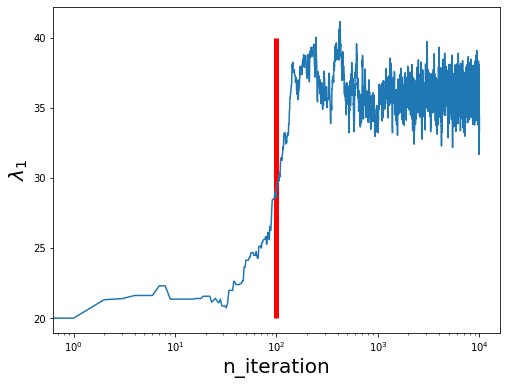

In [8]:
plt.rcParams['figure.figsize']=8,6
plt.plot(D.T[0])
plt.ylabel("$\lambda_1$",fontsize=20)
plt.xlabel("n_iteration",fontsize=20)
plt.vlines(100,20,40,color='red',linewidth=5)
plt.xscale('log')

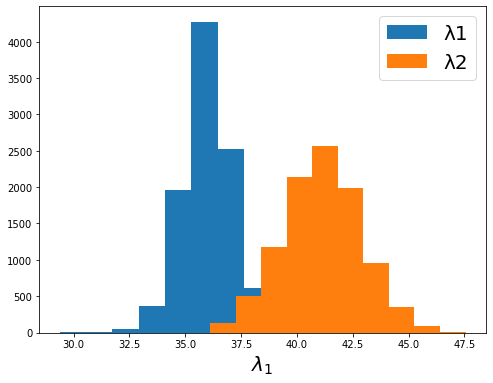

In [9]:
plt.hist(D.T[0][100:],label='λ1')
plt.hist(D.T[1][100:],label='λ2')
plt.xlabel("$\lambda_1$",fontsize=20)
plt.legend(fontsize=20)
plt.show()

In [10]:
# gives marginalized posteriors
print('mean(λ1 is)',np.mean(D.T[0][100:]))
print('std(λ1 is)',np.std(D.T[0][100:]))

mean(λ1 is) 36.00205594853932
std(λ1 is) 1.1442609277763531


In [11]:
print('mean(λ2 is)',np.mean(D.T[1][100:]))
print('std(λ2 is)',np.std(D.T[1][100:]))

mean(λ2 is) 41.13357440593459
std(λ2 is) 1.7499740785441427


In [12]:
print('mean(W_s is)',np.round(np.mean(D.T[2][100:])))

mean(W_s is) 33.0


a) More iterations gets closer to actual value of λ1 and λ2. If the starting parameters are closer to the actual values, then it takes fewer iterations to converge.

b) The values closely match the values from the manual, non MCMC method.

c) to calculate P(λ2 - λ1) > 5, first note that mean of λ1 is 35.9 and std(λ1) is 1.1. This means that P(34.8<λ1<37.0)=68% because the dist is roughly normal. similarly, P(39.5<λ2<42.7)=68%. The Probability that λ2 is 5 greater than λ1 is roughly the same along their distributions, so it's about 68%.

## 2) K-means clustering

a, b) write and implement python code for K-means clustering in euclidean space

In [13]:
# Start with k centers
# Cluster each point with the center nearest to it
# find the centroid of each cluster
# replace the set of old centers with the centroids
# repeat the above two steps until the centers converge
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
import math
import sklearn

In [14]:
# generate the pseudo data
from sklearn.datasets import make_blobs
X,Y = make_blobs(n_samples=500, cluster_std=0.8, centers=3, n_features=2, random_state=0)

b) Considering 3 clusters, apply your function in part a to the dataset you have created.
c) Here we knew the number of clusters, but this is not the case in real problems. Explain a method where we can determine optimal number of clusters in K-means algorithm.
d) Apply your method in part c to the data you have generated and verify that the optimal number of the cluster for part b is three.

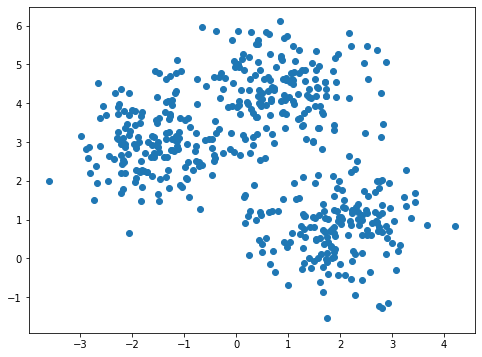

In [15]:
# plot the data
plt.scatter(X[:,0],X[:,1])

In [16]:
# referenced code from https://benalexkeen.com/k-means-clustering-in-python/

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# build dataframe for holding values, distances, and closest centroids
df = pd.DataFrame({
    'x' : X[:,0],
    'y' : X[:,1]})
df.head()

,x,y
0,1.077800,4.625379
1,-1.851657,3.497377
2,-1.932918,2.076378
3,1.488375,3.010222
4,-0.572754,4.454810


In [19]:
# init centroids
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(-10, 10), np.random.randint(-10, 10)]
    for i in range(k)
}
centroids

{1: [-1, 6], 2: [-6, 0], 3: [2, 5]}

In [20]:
# function to measure distances, assign each point to the closest centroid
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    return df

In [21]:
# calculate distances, identify closest centroid
df = assignment(df, centroids)
print(df.head())

          x         y  distance_from_1  distance_from_2  distance_from_3  \
0  1.077800  4.625379         2.491352         8.455139         0.995387   
1 -1.851657  3.497377         2.643566         5.425900         4.134385   
2 -1.932918  2.076378         4.033007         4.566454         4.900552   
3  1.488375  3.010222         3.889830         8.070762         2.054501   
4 -0.572754  4.454810         1.603169         7.021420         2.629885   

   closest  
0        3  
1        1  
2        1  
3        3  
4        1  


In [22]:
# setup loop to measure and reassign closest centroids
import copy

old_centroids = copy.deepcopy(centroids)

# update closest centroid assignment
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

In [23]:
df = assignment(df, centroids)
print(df.head())

          x         y  distance_from_1  distance_from_2  distance_from_3  \
0  1.077800  4.625379         0.316213         3.114721         3.934037   
1 -1.851657  3.497377         2.875759         0.612866         4.651325   
2 -1.932918  2.076378         3.637140         0.962051         4.069761   
3  1.488375  3.010222         1.489069         3.043773         2.268954   
4 -0.572754  4.454810         1.462696         1.787736         4.440734   

   closest  
0        1  
1        2  
2        2  
3        1  
4        1  


c) If the number of clusters were not known, I would run the algorithm for a range of clusters and measure the mean distance from each point to its centroid at the end. I would then plot the "within-cluster" sum of square distances. At the value of k where the distances start flattening out, I would pick that k because adding more centers only decreases the gain in information. Roughly referencing the "Elbow Method" https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

d) run and plot the square distances per k

In [24]:
# run with k=1
df1 = pd.DataFrame({
    'x' : X[:,0],
    'y' : X[:,1]})
df1.head()

k = 1
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(-10, 10), np.random.randint(-10, 10)]
    for i in range(k)
}
centroids

{1: [4, 1]}

In [25]:
df1 = assignment(df1, centroids)
print(df1.head())

          x         y  distance_from_1  closest
0  1.077800  4.625379         4.656461        1
1 -1.851657  3.497377         6.362294        1
2 -1.932918  2.076378         6.029768        1
3  1.488375  3.010222         3.217026        1
4 -0.572754  4.454810         5.731125        1


In [26]:
df1['sq_distance_from_1']=df1['distance_from_1'] ** 2
print(df1.head())

          x         y  distance_from_1  closest  sq_distance_from_1
0  1.077800  4.625379         4.656461        1           21.682626
1 -1.851657  3.497377         6.362294        1           40.478786
2 -1.932918  2.076378         6.029768        1           36.358107
3  1.488375  3.010222         3.217026        1           10.349253
4 -0.572754  4.454810         5.731125        1           32.845791


In [31]:
df1['sq_distance_from_1'].sum(axis=0)

10491.245536304126

In [32]:
distances = [1,df1['sq_distance_from_1'].sum(axis=0)] # [k, sum of square distances]

In [33]:
# run for k=2
df2 = pd.DataFrame({
    'x' : X[:,0],
    'y' : X[:,1]})
df2.head()

k = 2
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(-5, 5), np.random.randint(-5, 5)]
    for i in range(k)
}
centroids

df2 = assignment(df2, centroids)

while True:
    closest_centroids = df2['closest'].copy(deep=True)
    centroids = update(centroids)
    df2 = assignment(df2, centroids)
    if closest_centroids.equals(df2['closest']):
        break

print(df2.head())

          x         y  distance_from_1  distance_from_2  closest
0  1.077800  4.625379         0.316213         3.114721        1
1 -1.851657  3.497377         2.875759         0.612866        2
2 -1.932918  2.076378         3.637140         0.962051        2
3  1.488375  3.010222         1.489069         3.043773        1
4 -0.572754  4.454810         1.462696         1.787736        1


In [34]:
df2['sq_distance_from_1']=df2['distance_from_1'] ** 2
df2['sq_distance_from_2']=df2['distance_from_2'] ** 2
print(df2.head())

          x         y  distance_from_1  distance_from_2  closest  \
0  1.077800  4.625379         0.316213         3.114721        1   
1 -1.851657  3.497377         2.875759         0.612866        2   
2 -1.932918  2.076378         3.637140         0.962051        2   
3  1.488375  3.010222         1.489069         3.043773        1   
4 -0.572754  4.454810         1.462696         1.787736        1   

   sq_distance_from_1  sq_distance_from_2  
0            0.099990            9.701488  
1            8.269989            0.375605  
2           13.228790            0.925542  
3            2.217326            9.264555  
4            2.139479            3.196000  


In [40]:
mean_distance2 = (df2['sq_distance_from_1'].sum(axis=0) + df2['sq_distance_from_2'].sum(axis=0))/2
distances = [[1,df1['sq_distance_from_1'].sum(axis=0)],[2,mean_distance2]]
distances

[[1, 10491.245536304126], [2, 4538.897069169747]]

In [41]:
# run for k=3, calculate distances for k=3
df['sq_distance_from_1']=df['distance_from_1'] ** 2
df['sq_distance_from_2']=df['distance_from_2'] ** 2
df['sq_distance_from_3']=df['distance_from_3'] ** 2

mean_distance3 = (df['sq_distance_from_1'].sum(axis=0) + df['sq_distance_from_2'].sum(axis=0) + df['sq_distance_from_3'].sum(axis=0)) / 3

distances.append([3,mean_distance3])
distances

[[1, 10491.245536304126], [2, 4538.897069169747], [3, 4912.52728035191]]

In [45]:
# run for k=4, calculate distances
# can't get this one to work
df4 = pd.DataFrame({
    'x' : X[:,0],
    'y' : X[:,1]})

k = 4
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(-1, 1), np.random.randint(-1, 1)]
    for i in range(k)
}
centroids

df4 = assignment(df4, centroids)

while True:
    closest_centroids = df4['closest'].copy(deep=True)
    centroids = update(centroids)
    df4 = assignment(df4, centroids)
    if closest_centroids.equals(df4['closest']):
        break
        
print(df4.head())

          x         y  distance_from_1  distance_from_2  distance_from_3  \
0  1.077800  4.625379         0.316213         3.114721         3.934037   
1 -1.851657  3.497377         2.875759         0.612866         4.651325   
2 -1.932918  2.076378         3.637140         0.962051         4.069761   
3  1.488375  3.010222         1.489069         3.043773         2.268954   
4 -0.572754  4.454810         1.462696         1.787736         4.440734   

   distance_from_4  closest  
0              NaN        1  
1              NaN        2  
2              NaN        2  
3              NaN        1  
4              NaN        1  


I can't get the 4 kernel version of this program to run, probably due to my setup of the kernel or randomness. I would then plot the distances and see that the mean distances decreases at k=3, therefore identifying 3 kernels as the appropriate amount.